In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base =automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station =Base.classes.station  


In [8]:
# Create our session (link) from Python to the DB
Session =Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
most_recent_date = Session.query(func.max(measurement.date)).scalar()
print(f"Most Recent Date {most_recent_date}")

Most Recent Date 2017-08-23


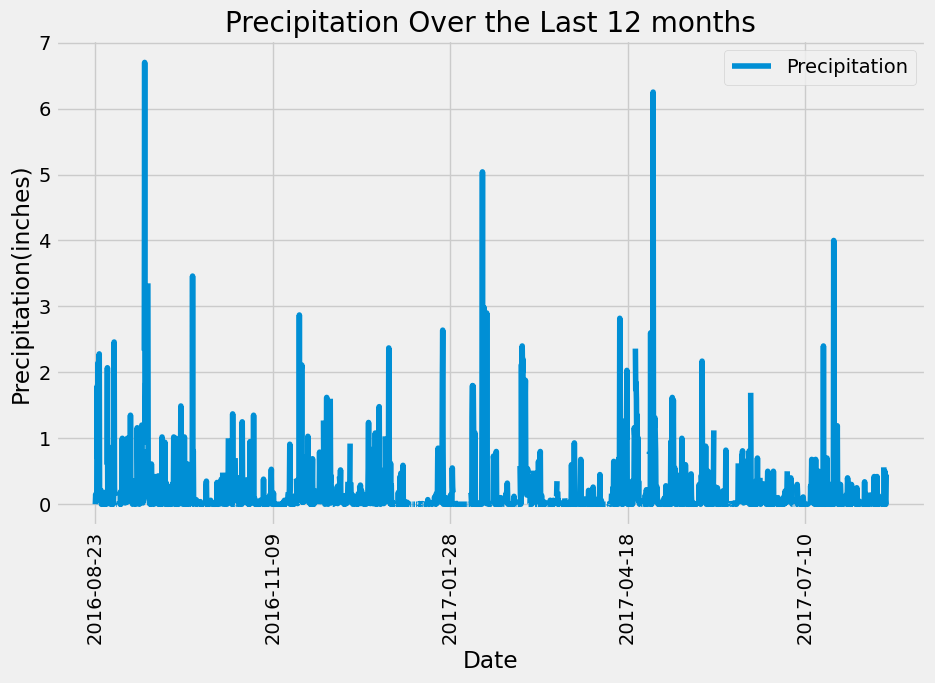

In [10]:


# Perform a query to retrieve the data and precipitation scores
precipitation_data =(Session.query(measurement.date,measurement.prcp)
                     .filter(measurement.date >=("2016-08-23"))
                     .order_by(measurement.date)
                     .all())

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(precipitation_data, columns=["Date", "Precipitation"])


# Sort the dataframe by date
df =df.sort_values(by="Date",ascending=True)
df.plot(kind="line", x="Date",figsize=(10,6),rot=90)


# Use Pandas Plotting with Matplotlib to plot the data
plt.xlabel("Date")
plt.ylabel("Precipitation(inches)")
plt.title("Precipitation Over the Last 12 months")
plt.show()

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_statistics =df["Precipitation"].describe()
print(summary_statistics)

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
total_stations = Session.query(func.count()).select_from(station).scalar()
print(f"Total number of stations: {total_stations}")

Total number of stations: 9


In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
most_active_stations = (Session.query(measurement.station, func.count(measurement.station))
                        .group_by(measurement.station)
                        .order_by(func.count(measurement.station).desc())
                        .all())
                        


# List the stations and their counts in descending order.
print ("stations  and their observations counts (Descending Order):")
for station, count in most_active_stations:
    print(f"Station {station}: {count}")

stations  and their observations counts (Descending Order):
Station USC00519281: 2772
Station USC00519397: 2724
Station USC00513117: 2709
Station USC00519523: 2669
Station USC00516128: 2612
Station USC00514830: 2202
Station USC00511918: 1979
Station USC00517948: 1372
Station USC00518838: 511


In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# most_active_stations =station_count[0][0]

most_active_station = most_active_stations[0][0]
temp_stats = Session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
    filter(measurement.station == most_active_station).all()
print(temp_stats)





[(54.0, 85.0, 71.66378066378067)]


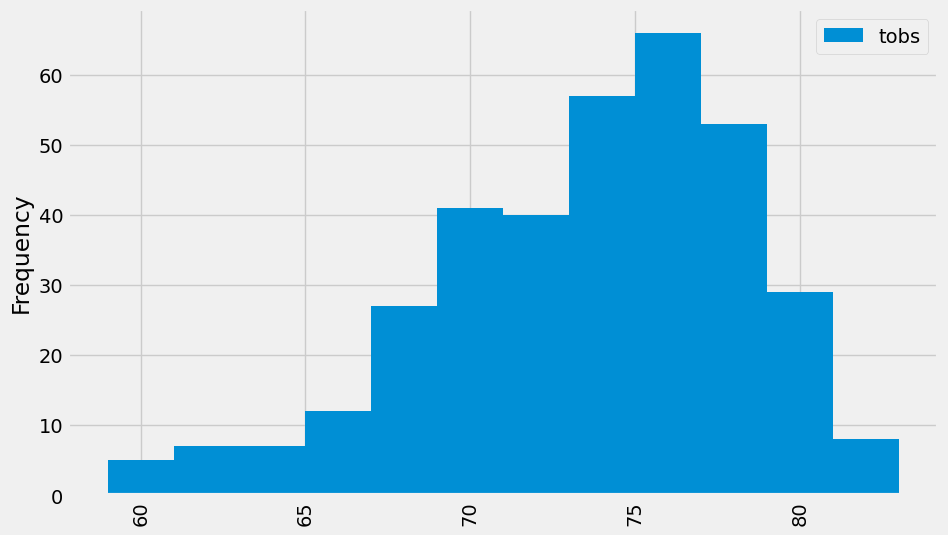

In [22]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
#
temp_stats =( Session.query(measurement.tobs)
             .filter(measurement.station == most_active_station)
             .filter(measurement.date >=("2016-08-23"))
             .all()
             )
df=pd.DataFrame(temp_stats)
df.plot(kind="hist", bins=12,figsize=(10,6),rot=90)
plt.show()

# Close Session

In [23]:
# Close Session
Session.close()